<a href="https://colab.research.google.com/github/Sumaid/digit_classifier/blob/master/q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN Classification for Predicting Hand-written digits

# Basic kNN




## Train Set Size :

Training on entire data is proving to be very computationally expensive task, hence a subset of training data can be used to calculate distances and find most occuring class.

## Distance Parameter : 

1.   Euclidean Distance 
2.   Manhatten Distance 
3.   Hamming Distance
4.   Cosine Similarity 

## K Parameter : 

1.   K = 5
2.   K = 7
3.   K = 9
4.   K = 11
5.   K = 13

In [0]:
import numpy as np
import pandas as pd
import heapq as hp
import collections as cl

class KNNClassifier:

    def __init__(self, K, p, size):
        self.K = K
        self.size = size
        if p <= 2:
          self.dist = lambda x,y : np.linalg.norm(np.asarray(x)-np.asarray(y),p)
        elif p == 3:
          self.dist = lambda x,y : (np.linalg.norm(x) * np.linalg.norm(y)/np.dot(x, y)) if np.dot(x, y)!=0 else float('Inf')
        
    def train(self,filename):
        self.train_df = pd.read_csv(filename, header=None).head(self.size)

    def predict(self,filename):
        predict_df = pd.read_csv(filename, header=None)
        predictions = []
        for inp_row in predict_df.itertuples():
            heap = []
            for row in self.train_df.itertuples():
                dis = self.dist(row[2:],inp_row[1:])
                if len(heap) == self.K:
                    hp.heappushpop(heap, (-1*dis, row[1]))
                else:
                    hp.heappush(heap, (-1*dis, row[1]))
            closest_classes = [clos for _,clos in heap]
            predictions += [cl.Counter(closest_classes).most_common(1)[0][0]]
        return predictions
            

### Testing Part : 

Following metrics are calculated to evaluate the performance of the algorithm


*   Accuracy Score
*   F1 Score 
*   Confusion Matrix
*   Accuracy vs K Plot


In [0]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
test_labels = list()

def fone(cur,test_labels,predictions):
  trues = [0]*len(predictions)
  predicteds = [0]*len(predictions)
  for i in range(len(predictions)):
    trues[i] = 1 if test_labels[i] == cur else 0
    predicteds[i] = 1 if predictions[i] == cur else 0
  return f1_score(trues,predicteds)

def calc_mad(x):
  med = np.median(x)
  return med,sum(abs(i-med) for i in x)

with open("./Datasets/q1/test_labels.csv") as f:
  for line in f:
    test_labels.append(int(line))

def tester(k_list,dist,size):
  accuracies = []
  for k in k_list:
    print("K is "+str(k))
    knn_classifier = KNNClassifier(k,dist,size)
    knn_classifier.train('./Datasets/q1/train.csv')
    predictions = knn_classifier.predict('./Datasets/q1/test.csv')
    acc = accuracy_score(test_labels, predictions)
    accuracies += [acc*100]
    print("Accuracy : "+str(acc*100)+"%")
    print("Confusion Matrix:")
    conf = confusion_matrix(test_labels, predictions)
    print("     0   1   2   3   4   5   6   7   8   9")
    for row_label, row in zip(["0","1","2","3","4","5","6","7","8","9"], conf):
      print('%s [%s]' % (row_label, ' '.join('%03s' % i for i in row)))
    print("")
    fone_arr = []
    for i in range(10):
      fone_arr += [fone(i,test_labels,predictions)]
      print("F-1 score for class with label: "+str(i)+" is "+str(fone_arr[-1]*100)[:5])
    print("")
    print("Mean F-1 score is "+str(np.mean(fone_arr)*100)[:5]+"% +/- "+str(np.std(fone_arr)*100)[:5]+"%")
    med, mad = calc_mad(fone_arr)
    print("Median F-1 score is "+str(med*100)[:5]+"% +/- "+str(mad*100)[:5]+"%")
    print("")
    print("-----------------------------------------------------------------")
    print("")

  if len(k_list) == 1: return
  plt.plot(k_list,accuracies)
  plt.ylabel('Accuracy')
  plt.xlabel('K')
  plt.show()



# Training on subset of dataset:

First parameter of tester is the array of K's on which we want to test

Paramaters : 

*   Array of K's on which we want to test
*   Distance parameter, 0 for Hamming, 1 for Manhatten, 2 for Euclidean and 4 for Cosine Similarity
*   Size of training data to consider, 1<=size<=20000


##Euclidean Distance :


K is 5
Accuracy : 86.6%
Confusion Matrix:
     0   1   2   3   4   5   6   7   8   9
0 [ 91   0   0   0   1   0   1   0   1   0]
1 [  0 100   0   1   0   0   0   0   0   0]
2 [  1   9  88   3   1   0   1   2   3   0]
3 [  2   2   1  97   0   2   0   1   2   1]
4 [  0   4   0   0  67   0   2   1   0  17]
5 [  1   4   0  10   0  61   4   0   0   1]
6 [  1   0   0   0   0   1  98   0   1   0]
7 [  0   7   0   0   1   0   0  88   0   8]
8 [  1   3   1   8   1   1   0   1  79   5]
9 [  2   1   1   0   2   0   0   7   2  97]

F-1 score for class with label: 0 is 94.30
F-1 score for class with label: 1 is 86.58
F-1 score for class with label: 2 is 88.44
F-1 score for class with label: 3 is 85.46
F-1 score for class with label: 4 is 81.70
F-1 score for class with label: 5 is 83.56
F-1 score for class with label: 6 is 94.68
F-1 score for class with label: 7 is 86.27
F-1 score for class with label: 8 is 84.04
F-1 score for class with label: 9 is 80.49

Mean F-1 score is 86.55% +/- 4.543%
Median 

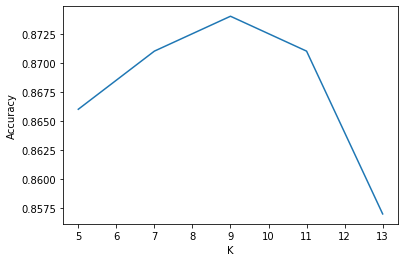

In [3]:
tester([5,7,9,11,13],2,1000)

## Cosine Similarity : 

In [0]:
tester([5,7,9,11,13],3,1000)

K is 5
Accuracy : 89.60000000000001%
Confusion Matrix:
     0   1   2   3   4   5   6   7   8   9
0 [ 90   0   0   1   0   0   2   0   1   0]
1 [  0 100   0   1   0   0   0   0   0   0]
2 [  1   1 100   1   0   0   3   1   1   0]
3 [  3   1   0  96   0   2   0   0   5   1]
4 [  0   3   0   0  72   0   2   2   0  12]
5 [  3   1   0   6   0  63   4   0   4   0]
6 [  2   0   0   0   0   0  99   0   0   0]
7 [  0   6   0   0   1   0   0  88   0   9]
8 [  1   0   3   5   1   0   1   0  87   2]
9 [  3   0   0   0   1   1   0   4   2 101]

F-1 score for class with label: 0 is 91.37
F-1 score for class with label: 1 is 93.89
F-1 score for class with label: 2 is 94.78
F-1 score for class with label: 3 is 88.07
F-1 score for class with label: 4 is 86.74
F-1 score for class with label: 5 is 85.71
F-1 score for class with label: 6 is 93.39
F-1 score for class with label: 7 is 88.44
F-1 score for class with label: 8 is 87.0
F-1 score for class with label: 9 is 85.23

Mean F-1 score is 89.46% +/- 3.

## Manhatten Distance :

K is 5
Accuracy : 85.6%
Confusion Matrix:
     0   1   2   3   4   5   6   7   8   9
0 [ 90   0   0   0   1   1   1   1   0   0]
1 [  0 100   0   1   0   0   0   0   0   0]
2 [  1  13  85   3   0   0   1   2   3   0]
3 [  0   3   1  98   0   2   0   1   2   1]
4 [  0   5   0   0  67   0   1   2   0  16]
5 [  0   5   0  12   0  58   5   0   0   1]
6 [  1   3   0   0   0   0  97   0   0   0]
7 [  0   9   0   0   2   0   0  87   0   6]
8 [  1   6   0   6   1   1   0   0  78   7]
9 [  3   1   1   0   3   0   0   7   1  96]

F-1 score for class with label: 0 is 94.73
F-1 score for class with label: 1 is 81.30
F-1 score for class with label: 2 is 87.17
F-1 score for class with label: 3 is 85.96
F-1 score for class with label: 4 is 81.21
F-1 score for class with label: 5 is 81.11
F-1 score for class with label: 6 is 94.17
F-1 score for class with label: 7 is 85.29
F-1 score for class with label: 8 is 84.78
F-1 score for class with label: 9 is 80.33

Mean F-1 score is 85.60% +/- 4.959%
Median 

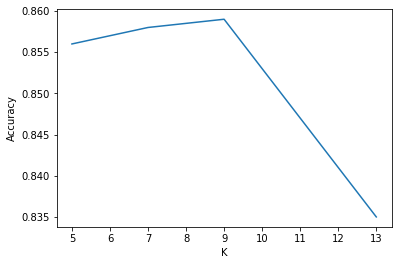

In [5]:
tester([5,7,9,11,13],1,1000)

# Random Guessing




Since we are classifying data into 10 classes, we can take 10% as the baseline accuracy.

Following is an implementation of randomly guessing hand written digit.

In [0]:
import numpy as np
import pandas as pd

class KNNClassifier:

    def __init__(self, K, p, size):
        pass
        
    def train(self,filename):
        pass

    def predict(self,filename):
        predict_df = pd.read_csv(filename, header=None)
        return np.random.randint(0,9,len(predict_df))

# Scikit-learn's kNN Classifier



In [0]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

class KNNClassifier:

    def __init__(self, K, p, size):
        self.neigh = KNeighborsClassifier(n_neighbors=K)
        self.size = size
        
    def train(self,filename):
        df = pd.read_csv(filename, header=None).head(self.size)
        X = df.drop(columns=df.columns[0])
        y = df[df.columns[0]].values
        self.neigh.fit(X, y)

    def predict(self,filename):
        predict_df = pd.read_csv(filename, header=None)
        return self.neigh.predict(predict_df)
